In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

plt.rcParams["figure.dpi"] = 140

In [2]:
# ===============================================================
# 1.1 GEOMETRY PARAMETERS: LENGTHS
# ===============================================================

# Ground / reference joint (fixed in space)
# You can move the mechanism around by changing these:
x_D1 = 48.6155671498
y_D1 = -6.4613681972

# Link lengths L_parentChild and angles theta_parentChild (radians)
# (All coordinates are reconstructed from these using cos/sin.)

# 1
# D1 -> C1
L_D1C1 = 10.4601693848
theta_D1C1 = 1.9106624203

# 2
# D1 -> A1
L_D1A1 = 8.8527418635
theta_D1A1 = -0.0392968593

# 3
# C1 -> B1
L_C1B1 = 10.0000000000
theta_C1B1 = 0.0265008237

# 4
# C1 -> B2
L_C1B2 = 37.2362250806
theta_C1B2 = 0.2035122240

# 5
# A1 -> E1
L_A1E1 = 16.3998595264
theta_A1E1 = 1.6680034675

# 6
# B1 -> A2
L_B1A2 = 17.3162251227
theta_B1A2 = 0.4326839268

# 7
# B2 -> C2
L_B2C2 = 12.5066028503
theta_B2C2 = -1.6987843250

# 8
# B2 -> E2
L_B2E2 = 14.6967913192
theta_B2E2 = -1.2935679537

# 9
# E1 -> F1
L_E1F1 = 3.0000000000
theta_E1F1 = -0.0352951928

# 10
# A2 -> D2
L_A2D2 = 12.4330870621
theta_A2D2 = -1.6388504248

# 11
# C2 -> D3
L_C2D3 = 24.6287269961
theta_C2D3 = -0.0592824904

# 12
# C2 -> A3
L_C2A3 = 14.8733110156
theta_C2A3 = -0.0808009626

# 13
# E2 -> F2
L_E2F2 = 2.0000000000
theta_E2F2 = 0.0512410696

# 14
# D3 -> C3
L_D3C3 = 7.0563542700
theta_D3C3 = 1.6615143784

# 15
# D3 -> E3
L_D3E3 = 8.3008941762
theta_D3E3 = 1.4181822757

# 16
# A3 -> B3
L_A3B3 = 7.5524454202
theta_A3B3 = 1.6837796525

# 17
# C3 -> B4
L_C3B4 = 17.0800300902
theta_C3B4 = -0.0025353519

# 18
# E3 -> F3
L_E3F3 = 3.0000000000
theta_E3F3 = -0.2157287177

# 19
# B3 -> C4
L_B3C4 = 37.1108334967
theta_B3C4 = -0.0277436247

# 20
# B4 -> A4
L_B4A4 = 4.6255640595
theta_B4A4 = -1.9103744900

# 21
# F3 -> D4
L_F3D4 = 21.4038551915
theta_F3D4 = -0.2583285563


In [3]:
# ===============================================================
# 1.2 GEOMETRY PARAMETERS: ANGLES
# ===============================================================
def build_joints_from_lengths_angles():
    """
    Build the initial joint coordinates from the (L, theta) description.
    D1 is the root; all other joints are reached along rigid links.
    """
    joints = {}

    # Root joint
    joints["D1"] = (x_D1, y_D1)

    # 1) D1 -> C1
    xa, ya = joints["D1"]
    joints["C1"] = (
        xa + L_D1C1 * np.cos(theta_D1C1),
        ya + L_D1C1 * np.sin(theta_D1C1),
    )

    # 2) D1 -> A1
    xa, ya = joints["D1"]
    joints["A1"] = (
        xa + L_D1A1 * np.cos(theta_D1A1),
        ya + L_D1A1 * np.sin(theta_D1A1),
    )

    # 3) C1 -> B1
    xa, ya = joints["C1"]
    joints["B1"] = (
        xa + L_C1B1 * np.cos(theta_C1B1),
        ya + L_C1B1 * np.sin(theta_C1B1),
    )

    # 4) C1 -> B2
    xa, ya = joints["C1"]
    joints["B2"] = (
        xa + L_C1B2 * np.cos(theta_C1B2),
        ya + L_C1B2 * np.sin(theta_C1B2),
    )

    # 5) A1 -> E1
    xa, ya = joints["A1"]
    joints["E1"] = (
        xa + L_A1E1 * np.cos(theta_A1E1),
        ya + L_A1E1 * np.sin(theta_A1E1),
    )

    # 6) B1 -> A2
    xa, ya = joints["B1"]
    joints["A2"] = (
        xa + L_B1A2 * np.cos(theta_B1A2),
        ya + L_B1A2 * np.sin(theta_B1A2),
    )

    # 7) B2 -> C2
    xa, ya = joints["B2"]
    joints["C2"] = (
        xa + L_B2C2 * np.cos(theta_B2C2),
        ya + L_B2C2 * np.sin(theta_B2C2),
    )

    # 8) B2 -> E2
    xa, ya = joints["B2"]
    joints["E2"] = (
        xa + L_B2E2 * np.cos(theta_B2E2),
        ya + L_B2E2 * np.sin(theta_B2E2),
    )

    # 9) E1 -> F1
    xa, ya = joints["E1"]
    joints["F1"] = (
        xa + L_E1F1 * np.cos(theta_E1F1),
        ya + L_E1F1 * np.sin(theta_E1F1),
    )

    # 10) A2 -> D2
    xa, ya = joints["A2"]
    joints["D2"] = (
        xa + L_A2D2 * np.cos(theta_A2D2),
        ya + L_A2D2 * np.sin(theta_A2D2),
    )

    # 11) C2 -> D3
    xa, ya = joints["C2"]
    joints["D3"] = (
        xa + L_C2D3 * np.cos(theta_C2D3),
        ya + L_C2D3 * np.sin(theta_C2D3),
    )

    # 12) C2 -> A3
    xa, ya = joints["C2"]
    joints["A3"] = (
        xa + L_C2A3 * np.cos(theta_C2A3),
        ya + L_C2A3 * np.sin(theta_C2A3),
    )

    # 13) E2 -> F2
    xa, ya = joints["E2"]
    joints["F2"] = (
        xa + L_E2F2 * np.cos(theta_E2F2),
        ya + L_E2F2 * np.sin(theta_E2F2),
    )

    # 14) D3 -> C3
    xa, ya = joints["D3"]
    joints["C3"] = (
        xa + L_D3C3 * np.cos(theta_D3C3),
        ya + L_D3C3 * np.sin(theta_D3C3),
    )

    # 15) D3 -> E3
    xa, ya = joints["D3"]
    joints["E3"] = (
        xa + L_D3E3 * np.cos(theta_D3E3),
        ya + L_D3E3 * np.sin(theta_D3E3),
    )

    # 16) A3 -> B3
    xa, ya = joints["A3"]
    joints["B3"] = (
        xa + L_A3B3 * np.cos(theta_A3B3),
        ya + L_A3B3 * np.sin(theta_A3B3),
    )

    # 17) C3 -> B4
    xa, ya = joints["C3"]
    joints["B4"] = (
        xa + L_C3B4 * np.cos(theta_C3B4),
        ya + L_C3B4 * np.sin(theta_C3B4),
    )

    # 18) E3 -> F3
    xa, ya = joints["E3"]
    joints["F3"] = (
        xa + L_E3F3 * np.cos(theta_E3F3),
        ya + L_E3F3 * np.sin(theta_E3F3),
    )

    # 19) B3 -> C4
    xa, ya = joints["B3"]
    joints["C4"] = (
        xa + L_B3C4 * np.cos(theta_B3C4),
        ya + L_B3C4 * np.sin(theta_B3C4),
    )

    # 20) B4 -> A4
    xa, ya = joints["B4"]
    joints["A4"] = (
        xa + L_B4A4 * np.cos(theta_B4A4),
        ya + L_B4A4 * np.sin(theta_B4A4),
    )

    # 21) F3 -> D4
    xa, ya = joints["F3"]
    joints["D4"] = (
        xa + L_F3D4 * np.cos(theta_F3D4),
        ya + L_F3D4 * np.sin(theta_F3D4),
    )

    return joints


# Initial joint coordinates, fully determined by link lengths & angles:
joints0 = build_joints_from_lengths_angles()

# List of joint names
all_joints = sorted(joints0.keys())


In [19]:

# ===============================================================
# 2. RIGID CONNECTIONS (LENGTH CONSTRAINTS)
# ===============================================================

# Four-bars: rigid bars
fourbar_edges = [
    ("A1","B1"),("B1","C1"),("C1","D1"),("D1","A1"),
    ("A2","B2"),("B2","C2"),("C2","D2"),("D2","A2"),
    ("A3","B3"),("B3","C3"),("C3","D3"),("D3","A3"),
    ("A4","B4"),("B4","C4"),("C4","D4"),("D4","A4"),
]

# Couplers
coupler_edges = [("E1","F1"),("E2","F2"),("E3","F3")]

# Attachments of E/F to bars
triangle_edges = [
    ("E1","A1"),("E1","B1"),
    ("F1","D2"),("F1","C2"),
    ("E2","C2"),("E2","B2"),
    ("F2","A3"),("F2","B3"),
    ("E3","C3"),("E3","D3"),
    ("F3","A4"),("F3","D4"),
]

# Blue rigid weld connectors (YOUR correction)
blue_edges = [
    ("B1","A2"),
    ("C2","D3"),
    ("C3","B4"),\
    ("B2","C1"),   # RB1
    ("D2","A3"),   # RB2 diag 1
    ("C2","A3"),   # RB2 diag 2  (NEW)
    ("B3","C4"), 
]


rigid_edges = (
    fourbar_edges +
    coupler_edges +
    triangle_edges +
    blue_edges
)

# Reference lengths
edge_lengths = {}
for i, j in rigid_edges:
    xi, yi = joints0[i]
    xj, yj = joints0[j]
    edge_lengths[(i, j)] = np.hypot(xi - xj, yi - yj)

In [20]:
# ===============================================================
# 3. ORIENTATION (SIGNED AREA) CONSTRAINTS
# ===============================================================

def signed_area(p, q, r):
    """Signed area of triangle p-q-r (positive = CCW)."""
    return 0.5 * ((q[0]-p[0])*(r[1]-p[1]) - (q[1]-p[1])*(r[0]-p[0]))

# Choose triangles whose orientation we want to preserve
orientation_triangles = [
    ("A1","B1","E1"),   # rigid plate around E1
    ("D2","C2","F1"),   # rigid plate around F1

    ("C2","B2","E2"),   # around E2
    ("A3","B3","F2"),   # around F2

    ("C3","D3","E3"),   # around E3
    ("A4","D4","F3"),   # around F3

    # Inside composite rigid quads:
    ("B1","C1","B2"),   # RB1
    ("D2","C2","D3"),   # RB2
    ("B3","C3","B4"),   # RB3
]

area_ref = {}
for (i,j,k) in orientation_triangles:
    p = joints0[i]
    q = joints0[j]
    r = joints0[k]
    area_ref[(i,j,k)] = signed_area(p,q,r)

In [21]:
# ===============================================================
# 4. ACTUATION AND UNKNOWN SETUP
# ===============================================================

ground_joints = ["A1","D1"]
actuated_joint = "C1"

D1x0, D1y0 = joints0["D1"]
C1x0, C1y0 = joints0["C1"]
dx_C1, dy_C1 = C1x0 - D1x0, C1y0 - D1y0

def rotate_point_about(p, center, angle):
    x,y = p
    cx,cy = center
    dx,dy = x - cx, y - cy
    xr =  np.cos(angle)*dx - np.sin(angle)*dy
    yr =  np.sin(angle)*dx + np.cos(angle)*dy
    return (cx + xr, cy + yr)

unknown_joints = [
    name for name in all_joints
    if name not in ground_joints + [actuated_joint]
]

idx_map = {name: i for i, name in enumerate(unknown_joints)}

def pack_joints_to_q(jdict):
    q = np.zeros(2*len(unknown_joints))
    for name, i in idx_map.items():
        x,y = jdict[name]
        q[2*i]   = x
        q[2*i+1] = y
    return q

def unpack_q_to_joints(q, theta_val):
    joints = {}
    for name, i in idx_map.items():
        joints[name] = (q[2*i], q[2*i+1])
    # ground
    for g in ground_joints:
        joints[g] = joints0[g]
    # actuated
    joints[actuated_joint] = rotate_point_about((C1x0,C1y0), (D1x0,D1y0), theta_val)
    return joints

In [22]:
# ===============================================================
# 5. RESIDUALS AND SOLVER
# ===============================================================

def residuals(q, theta_val):
    joints = unpack_q_to_joints(q, theta_val)
    res = []

    # Length constraints
    for (i, j) in rigid_edges:
        xi, yi = joints[i]
        xj, yj = joints[j]
        L_ref = edge_lengths[(i, j)]
        L_now = np.hypot(xi - xj, yi - yj)
        res.append(L_now - L_ref)

    # Orientation (area) constraints
    for (i,j,k) in orientation_triangles:
        p = joints[i]
        q_ = joints[j]
        r = joints[k]
        A_ref = area_ref[(i,j,k)]
        A_now = signed_area(p, q_, r)
        res.append(A_now - A_ref)

    return np.array(res)

def solve_kinematics(theta_val, q0=None):
    if q0 is None:
        q0 = pack_joints_to_q(joints0)

    result = least_squares(
        residuals, q0,
        args=(theta_val,),
        xtol=1e-10, ftol=1e-10, gtol=1e-10,
        max_nfev=5000
    )
    q_sol = result.x
    joints = unpack_q_to_joints(q_sol, theta_val)
    return joints, q_sol, result.cost

In [23]:
# ===============================================================
# 6. PLOTTING
# ===============================================================

def plot_mechanism(joints, title):
    fig, ax = plt.subplots(figsize=(10,4))

    # Four-bars (red)
    for i,j in fourbar_edges:
        x1,y1 = joints[i]
        x2,y2 = joints[j]
        ax.plot([x1,x2],[y1,y2], 'r-', linewidth=2)

    # Couplers (green)
    for i,j in coupler_edges:
        x1,y1 = joints[i]
        x2,y2 = joints[j]
        ax.plot([x1,x2],[y1,y2], 'g-', linewidth=3)

    # Attachments (black)
    for i,j in triangle_edges:
        x1,y1 = joints[i]
        x2,y2 = joints[j]
        ax.plot([x1,x2],[y1,y2], 'k-', linewidth=1)

    # Welds and diagonals (blue)
    for i,j in blue_edges:
        x1,y1 = joints[i]
        x2,y2 = joints[j]
        ax.plot([x1,x2],[y1,y2], 'b-', linewidth=2)

    # Joints
    for name,(x,y) in joints.items():
        ax.scatter(x,y,color="black",s=15)
        ax.text(x+0.5,y+0.5,name,fontsize=8)

    ax.set_aspect("equal","box")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(title)
    ax.grid(True)
    plt.tight_layout()
    plt.show()

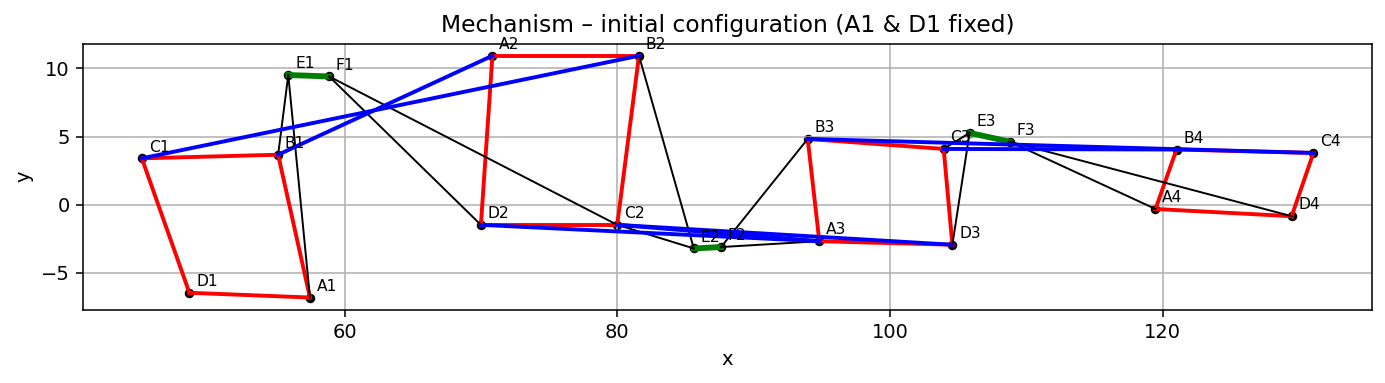

Solving kinematics for theta = -0.500 rad ...
Least-squares cost at solution: 5.278e-24


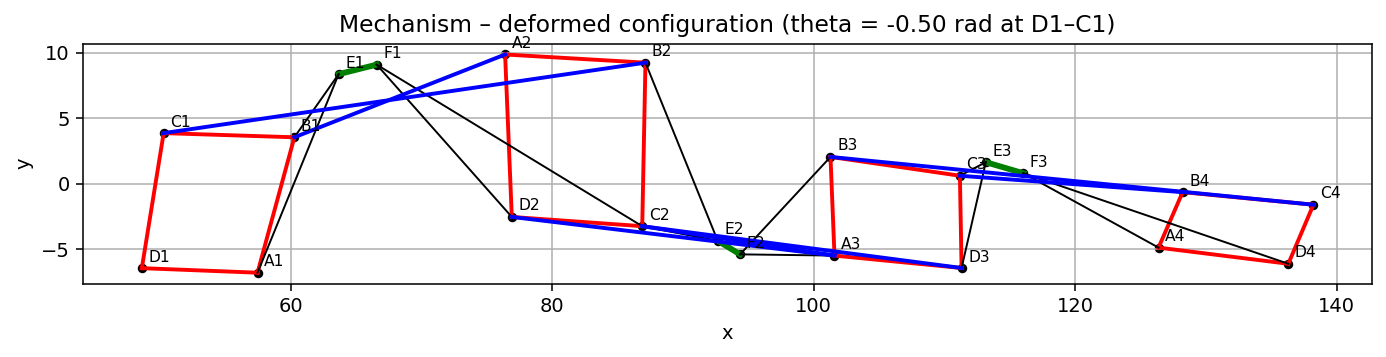

Solving kinematics for theta = -0.640 rad ...
Least-squares cost at solution: 5.680e-27


/var/folders/7w/fyg6wxrj52n3429fps54jy580000gn/T/ipykernel_21502/629408751.py:42: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot([x1,x2],[y1,y2], "k-", linestyle=ls, linewidth=1,


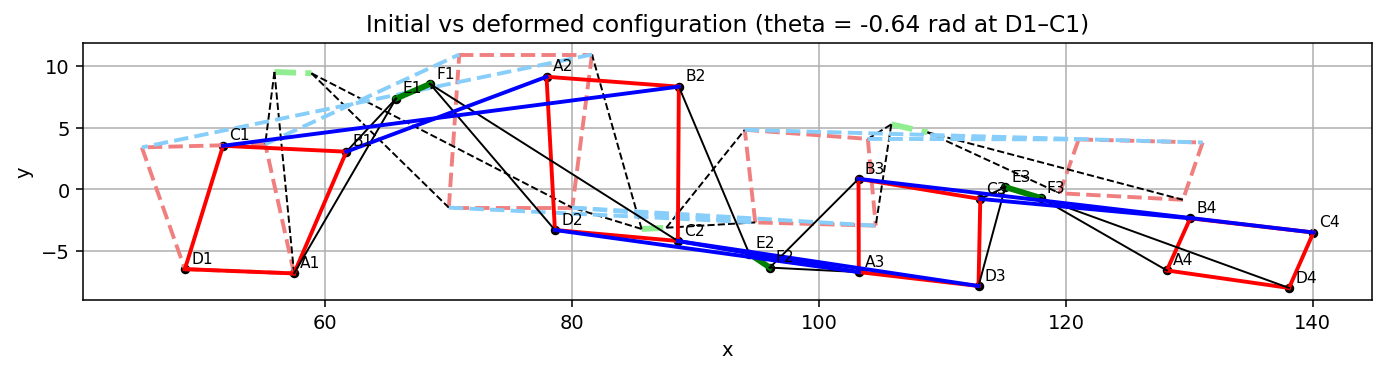

In [24]:
# ===============================================================
# 7. RUN: INITIAL AND THETA = -0.5 RAD
# ===============================================================

plot_mechanism(joints0, "Mechanism – initial configuration (A1 & D1 fixed)")

theta_demo = -0.5
print(f"Solving kinematics for theta = {theta_demo:.3f} rad ...")
joints_def, q_sol, cost = solve_kinematics(theta_demo)
print(f"Least-squares cost at solution: {cost:.3e}")

plot_mechanism(
    joints_def,
    f"Mechanism – deformed configuration (theta = {theta_demo:.2f} rad at D1–C1)"
)

def plot_mechanism_comparison(joints_ref, joints_def, theta_val):
    """
    Plot initial (ref) and deformed configurations in the same axes
    so the differences are clear.
    """
    fig, ax = plt.subplots(figsize=(10, 4))

    # --- helper to draw one configuration ---
    def draw_config(joints, color_four, color_coup, color_weld, ls="-", label_prefix=""):
        # four-bars
        for i,j in fourbar_edges:
            x1,y1 = joints[i]
            x2,y2 = joints[j]
            ax.plot([x1,x2],[y1,y2], color=color_four, linestyle=ls,
                    linewidth=2, label=f"{label_prefix}four-bar" if (i,j)==fourbar_edges[0] else "_nolegend_")
        # couplers
        for i,j in coupler_edges:
            x1,y1 = joints[i]
            x2,y2 = joints[j]
            ax.plot([x1,x2],[y1,y2], color=color_coup, linestyle=ls,
                    linewidth=3, label=f"{label_prefix}coupler" if (i,j)==coupler_edges[0] else "_nolegend_")
        # attachments
        for i,j in triangle_edges:
            x1,y1 = joints[i]
            x2,y2 = joints[j]
            ax.plot([x1,x2],[y1,y2], "k-", linestyle=ls, linewidth=1,
                    label=f"{label_prefix}attachments" if (i,j)==triangle_edges[0] else "_nolegend_")
        # blue welds + diagonals
        for i,j in blue_edges:
            x1,y1 = joints[i]
            x2,y2 = joints[j]
            ax.plot([x1,x2],[y1,y2], color=color_weld, linestyle=ls,
                    linewidth=2, label=f"{label_prefix}welds" if (i,j)==(blue_edges)[0] else "_nolegend_")

    # Draw initial in light colors, dashed
    draw_config(joints_ref,
                color_four="lightcoral",
                color_coup="lightgreen",
                color_weld="lightskyblue",
                ls="--",
                label_prefix="initial ")

    # Draw deformed in strong colors, solid
    draw_config(joints_def,
                color_four="red",
                color_coup="green",
                color_weld="blue",
                ls="-",
                label_prefix="deformed ")

    # Joints (deformed) as black dots
    for name,(x,y) in joints_def.items():
        ax.scatter(x,y,color="black",s=15)
        ax.text(x+0.5,y+0.5,name,fontsize=8)

    ax.set_aspect("equal","box")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(f"Initial vs deformed configuration (theta = {theta_val:.2f} rad at D1–C1)")
    ax.grid(True)
    # ax.legend(loc="upper right")
    plt.tight_layout()
    plt.show()

# initial plot (if you still want it alone)
# plot_mechanism(joints0, "Mechanism – initial configuration (A1 & D1 fixed)")

theta_demo = -0.64
print(f"Solving kinematics for theta = {theta_demo:.3f} rad ...")
joints_def, q_sol, cost = solve_kinematics(theta_demo)
print(f"Least-squares cost at solution: {cost:.3e}")

# comparison plot in same domain
plot_mechanism_comparison(joints0, joints_def, theta_demo)


In [25]:
# ===============================================================
# 7. PSEUDO-RIGID-BODY MODEL (PRBM) – FORCE–DEFLECTION
# ===============================================================
# For a printed PLA/PETG model (example)
E = 2.0e9        # Pa (pick your filament’s Young’s modulus)
b = 8e-3         # m   (actual flexure width in your print)
h = 2e-3         # m   (actual flexure thickness)
I = b * h**3 / 12
alpha_l = 0.15   # or whatever design you want




# ---- Define which edges get PRBM springs ----
# "Entire mechanism" here = all four-bar beams + all coupler beams.
# If you want to include more, you can extend the list below.
prbm_edges = fourbar_edges + coupler_edges

prbm_springs = []
for (i, j) in prbm_edges:
    prbm_springs.append(
        dict(
            name=f"k_{i}{j}",
            joint_i=i,
            joint_j=j,
        )
    )


def init_prbm_springs(joints_ref):
    """
    For each four-bar edge (leg):
      - leg length L_leg from reference joints (in mm)
      - convert to meters
      - flexure length at each end: l = alpha_l * L_leg
      - two end flexures in series → equivalent K_eq = (EI/l)/2 = EI/(2l)
      - store reference link angle θ_ij0
    """
    K = {}
    theta0 = {}
    for s in prbm_springs:
        name = s["name"]
        i = s["joint_i"]
        j = s["joint_j"]

        xi0, yi0 = joints_ref[i]
        xj0, yj0 = joints_ref[j]

        # geometry is in mm → convert to meters
        L_leg_mm = np.hypot(xj0 - xi0, yj0 - yi0)
        L_leg_m = L_leg_mm * 1e-3

        # small-length flexures at each end
        l_flex = alpha_l * L_leg_m      # length of *one* end flexure

        # Each end flexure: K_end = EI / l_flex
        # Two in series → equivalent K_eq = (K_end)/2 = EI/(2 l_flex)
        K_eq = E * I / (2.0 * l_flex)

        K[name] = K_eq

        # reference link angle
        theta0[name] = np.arctan2(yj0 - yi0, xj0 - xi0)

    return K, theta0




K_spring, theta0_spring = init_prbm_springs(joints0)


def compute_spring_deflections(joints):
    """
    Given current joints, compute Φ for each PRBM spring:
      Φ = wrapped(θ_ij - θ_ij0) in (-π, π)
    """
    Phi = {}
    for s in prbm_springs:
        name = s["name"]
        i = s["joint_i"]
        j = s["joint_j"]
        xi, yi = joints[i]
        xj, yj = joints[j]
        theta_ij = np.arctan2(yj - yi, xj - xi)

        dtheta = theta_ij - theta0_spring[name]
        # wrap into (-π, π) to avoid discontinuities
        dtheta = (dtheta + np.pi) % (2.0 * np.pi) - np.pi

        Phi[name] = dtheta
    return Phi



def prbm_input_torque(theta_val, q0=None, h=1e-4):
    """
    Compute input torque T_in(θ) using PRBM and virtual work.
    θ is the actuator rotation (C1 about D1).
    Virtual work:
        T_in = Σ K_i Φ_i * (∂Φ_i/∂θ)
    with ∂Φ_i/∂θ approximated by finite differences.
    """
    # central configuration
    joints_c, q_c, _ = solve_kinematics(theta_val, q0=q0)
    Phi_c = compute_spring_deflections(joints_c)

    # plus and minus for finite-difference derivative
    joints_p, q_p, _ = solve_kinematics(theta_val + h, q0=q_c)
    Phi_p = compute_spring_deflections(joints_p)

    joints_m, q_m, _ = solve_kinematics(theta_val - h, q0=q_c)
    Phi_m = compute_spring_deflections(joints_m)

    Tin = 0.0
    dPhi_dtheta = {}

    for s in prbm_springs:
        name = s["name"]
        Phi = Phi_c[name]
        dPhi = (Phi_p[name] - Phi_m[name]) / (2.0 * h)
        dPhi_dtheta[name] = dPhi
        Tin += K_spring[name] * Phi * dPhi

    return Tin, joints_c, q_c, Phi_c, dPhi_dtheta


def sweep_prbm_force_deflection(theta_min, theta_max, n_steps=50, tip_joint="A4"):
    """
    Sweep actuator angle θ and compute:
      - input torque T_in(θ)
      - x-deflection of `tip_joint` relative to reference
    Geometry is in mm, but we’ll store deflection also in mm here.
    """
    theta_vals = np.linspace(theta_min, theta_max, n_steps)
    Tin_vals = []
    tip_defl_x_mm = []

    x_tip_ref_mm = joints0[tip_joint][0]  # reference x in mm

    q0 = None
    for th in theta_vals:
        Tin, joints, q0, Phi, dPhi_dtheta = prbm_input_torque(th, q0=q0)
        Tin_vals.append(Tin)

        x_tip_mm = joints[tip_joint][0]
        tip_defl_x_mm.append(x_tip_mm - x_tip_ref_mm)

    return np.array(theta_vals), np.array(Tin_vals), np.array(tip_defl_x_mm)


def plot_prbm_force_deflection(theta_min, theta_max, n_steps=50, tip_joint="A4"):
    """
    Plot input torque vs x-deflection of A4 (in mm) over a θ range.
    """
    theta_vals, Tin_vals, dx_mm = sweep_prbm_force_deflection(
        theta_min, theta_max, n_steps, tip_joint
    )

    plt.figure(figsize=(6, 4))
    plt.plot(dx_mm, -Tin_vals, "-o", markersize=3)
    plt.xlabel(f"{tip_joint} x-deflection (mm)")
    plt.ylabel(r"$T_{\mathrm{in}}$ (Nm)")
    plt.grid(True)
    plt.title("PRBM torque vs A4 x-deflection")
    plt.tight_layout()
    plt.show()

def print_prbm_angle_table(theta_val, q0=None):
    """
    Prints a nicely formatted table of all PRBM spring rotations Φ
    at a given actuator angle theta_val.
    """
    # Solve kinematics
    joints, q_sol, _ = solve_kinematics(theta_val, q0=q0)

    # Compute spring deflections
    Phi = compute_spring_deflections(joints)

    print("\nPRBM Rotation Table")
    print(f"Actuator angle θ = {theta_val:.4f} rad")
    print("-" * 70)
    print(f"{'Name':<12} {'Joint_i':<10} {'Joint_j':<10} {'Phi (rad)':<12} {'Phi (deg)':<12}")
    print("-" * 70)

    for s in prbm_springs:
        name = s["name"]
        i = s["joint_i"]
        j = s["joint_j"]
        phi_rad = Phi[name]
        phi_deg = np.degrees(phi_rad)
        print(f"{name:<12} {i:<10} {j:<10} {phi_rad:<12.6f} {phi_deg:<12.3f}")

    print("-" * 70)
    print()


    # If you also want the torque vs angle, uncomment:
    # plt.figure(figsize=(6,4))
    # plt.plot(theta_vals, Tin_vals, "-o", markersize=3)
    # plt.xlabel(r"Actuator angle $\theta$ (rad)")
    # plt.ylabel(r"$T_{\mathrm{in}}$ (Nm)")
    # plt.grid(True)
    # plt.title("PRBM torque vs actuator angle")
    # plt.tight_layout()
    # plt.show()

# Example call (adjust θ range to your mechanism’s feasible motion):
# plot_prbm_force_deflection(theta_min=-0.15, theta_max=0.15, n_steps=40, tip_joint="A4")


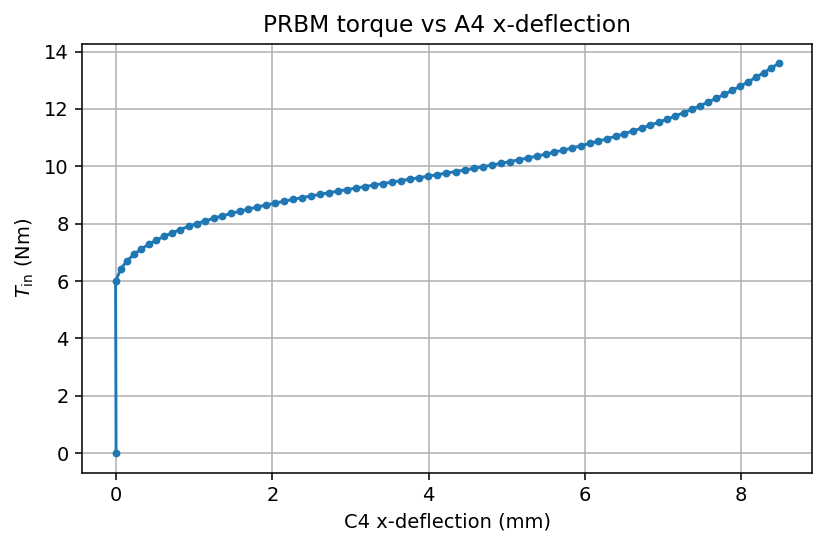

In [26]:
plot_prbm_force_deflection(theta_min=0, theta_max=-0.6, n_steps=80, tip_joint="C4")


In [27]:
print_prbm_angle_table(theta_val=-0.6)



PRBM Rotation Table
Actuator angle θ = -0.6000 rad
----------------------------------------------------------------------
Name         Joint_i    Joint_j    Phi (rad)    Phi (deg)   
----------------------------------------------------------------------
k_A1B1       A1         B1         -0.584902    -33.512     
k_B1C1       B1         C1         -0.069782    -3.998      
k_C1D1       C1         D1         -0.600000    -34.377     
k_D1A1       D1         A1         0.000000     0.000       
k_A2B2       A2         B2         -0.069782    -3.998      
k_B2C2       B2         C2         0.119258     6.833       
k_C2D2       C2         D2         -0.084068    -4.817      
k_D2A2       D2         A2         0.120425     6.900       
k_A3B3       A3         B3         -0.099812    -5.719      
k_B3C3       B3         C3         -0.084343    -4.832      
k_C3D3       C3         D3         -0.100854    -5.779      
k_D3A3       D3         A3         -0.084068    -4.817      
k_A4B4       

In [15]:
def solve_mechanism(theta):
    joints, q_out, result = solve_kinematics(theta, q0=None)
    return joints


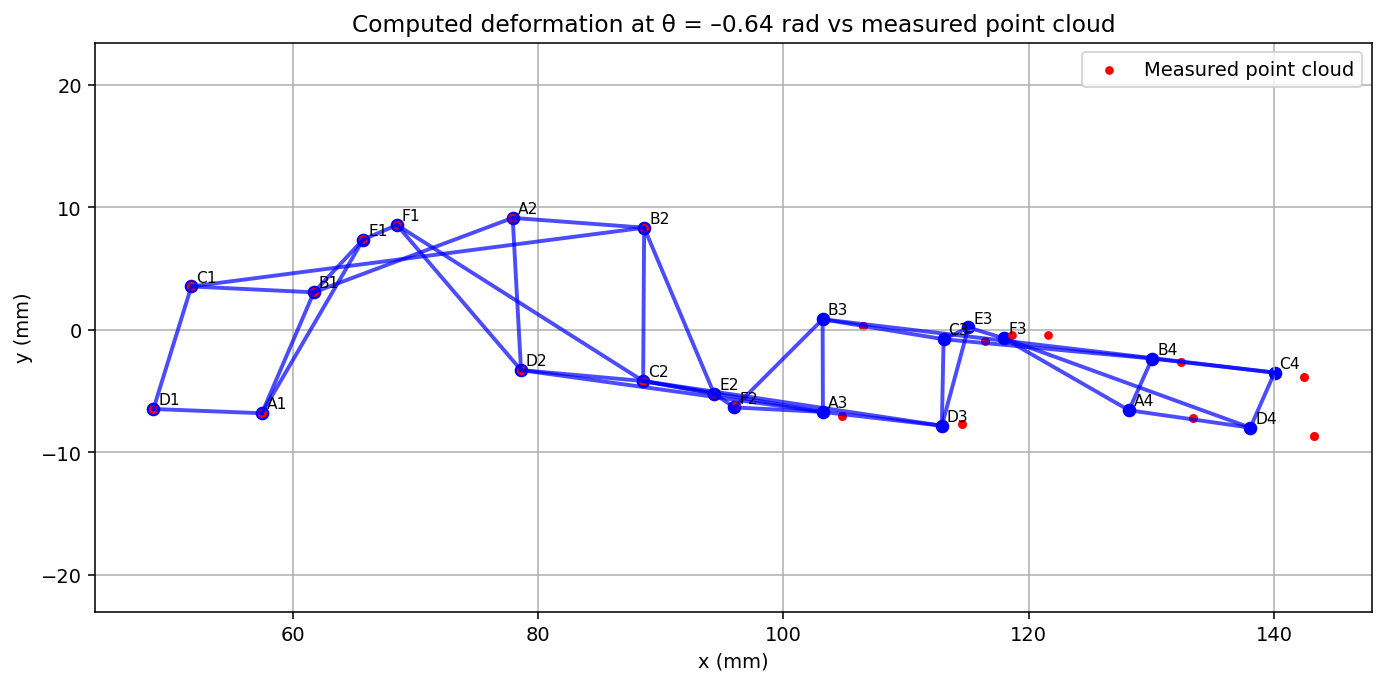

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# 1) Solve the mechanism at the measured input rotation
# ---------------------------------------------------------

theta_measured = -0.64   # rad

joints_calc, _, _ = solve_kinematics(theta_measured, q0=None)

# ---------------------------------------------------------
# 2) Extract the new point cloud (your 2nd dataset)
# ---------------------------------------------------------

def extract_points_from_cloud(four_bar_linkages, coupler_links):
    pts = []
    for linkage in four_bar_linkages:
        for (x1,y1,x2,y2) in linkage:
            pts.append([x1,y1])
            pts.append([x2,y2])
    for (x1,y1,x2,y2) in coupler_links:
        pts.append([x1,y1])
        pts.append([x2,y2])
    return np.array(pts)

# === paste your second point cloud exactly ===

four_bar_linkages_2 = [
    [[48.61556714979999, -6.4613681972, 51.6949069789, 3.535271727],
     [51.6949069789, 3.535271727, 61.6834871239, 3.057499096899999],
     [57.4614744999, -6.809163619299999, 48.61556714979999, -6.4613681972],
     [61.6834871239, 3.057499096899999, 57.4614744999, -6.809163619299999]],

    [[77.89278133919998, 9.130370357, 78.5861405469, -3.283368278199999],
     [78.5861405469, -3.283368278199999, 88.5467500295, -4.1700805965],
     [88.61427767030001, 8.336339949500001, 77.89278133919998, 9.130370357],
     [88.5467500295, -4.1700805965, 88.61427767030001, 8.336339949500001]],

    [[104.7931716357, -7.0168227748, 106.4790657566, 0.3450514999],
     [106.4790657566, 0.3450514999, 116.4031820584, -0.8845482837999998],
     [114.5341217729, -7.6888667091, 104.7931716357, -7.0168227748],
     [116.4031820584, -0.8845482837999998, 114.5341217729, -7.6888667091]],

    [[132.4394943465, -2.6518444088, 133.3789790866, -7.1809956861],
     [133.3789790866, -7.1809956861, 143.2622884642, -8.704214562899997],
     [142.4119775771, -3.871566397099999, 132.4394943465, -2.6518444088],
     [143.2622884642, -8.704214562899997, 142.4119775771, -3.871566397099999]]
]

coupler_links_2 = [
    [118.5966231108, -0.4500182507, 121.5961888484, -0.3989752693],
    [94.3350002916, -5.201348471, 96.09023920530001, -6.160064464199999],
    [65.7038055029, 7.368966445099999, 68.46314605919999, 8.546268315499997]
]

cloud_pts = extract_points_from_cloud(four_bar_linkages_2, coupler_links_2)

# ---------------------------------------------------------
# 3) Plot everything
# ---------------------------------------------------------

plt.figure(figsize=(10,5))

# Plot calculated mechanism
for name, (x,y) in joints_calc.items():
    plt.scatter(x, y, color='blue')
    plt.text(x+0.4, y+0.4, name, fontsize=8)

# Edges: you already have your list in your notebook named "RIGID_EDGES"
for (i, j) in rigid_edges:
    xi, yi = joints_calc[i]
    xj, yj = joints_calc[j]
    plt.plot([xi, xj], [yi, yj], 'b-', linewidth=2, alpha=0.7)

# Plot measured point cloud
plt.scatter(cloud_pts[:,0], cloud_pts[:,1],
            color='red', s=12, label='Measured point cloud')

plt.title("Computed deformation at θ = –0.64 rad vs measured point cloud")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.axis("equal")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
